In [216]:
# Book
# https://learninglink.oup.com/access/sorensen-whitta3e-student-resources?fbclid=IwZXh0bgNhZW0CMTEAAR6gTY7DFfad27WJlk1t835_u5PktQQJerg4INY1auArgPPwJuiXN9lPBBxvgg_aem_L0pGTfuVuW5RspPhzn-0dQ#tag_exercise-excel-data-files


In [217]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [218]:
file_path = r'C:\Users\chris\Desktop\makro-øk\ch13\Ex_13.3_dataset.xlsx'
column_names = ['Quarter', 'GDP', 'Private consumption', 'Private investment']
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols='A,B,C,D',names=column_names , skiprows=10, header=None, nrows=65, decimal=',')
pd.set_option('display.float_format', '{:.2f}'.format)
# print(df.head(2))

In [219]:
df['GDP'] = np.log(df['GDP'])
df['Private consumption'] = np.log(df['Private consumption'])
df['Private investment'] = np.log(df['Private investment'])

lam = 1600

cycle_gdp, trend_gdp = hpfilter(df['GDP'], lamb=lam)
cycle_consumption, trend_consumption = hpfilter(df['Private consumption'], lamb=lam)
cycle_investment, trend_investment = hpfilter(df['Private investment'], lamb=lam)

df['GDP cycle'], df['GDP trend'] = cycle_gdp, trend_gdp
df['Private consumption cycle'], df['Private consumption trend'] = cycle_consumption, trend_consumption
df['Private investment cycle'], df['Private investment trend'] = cycle_investment, trend_investment

x_values = df['Quarter']



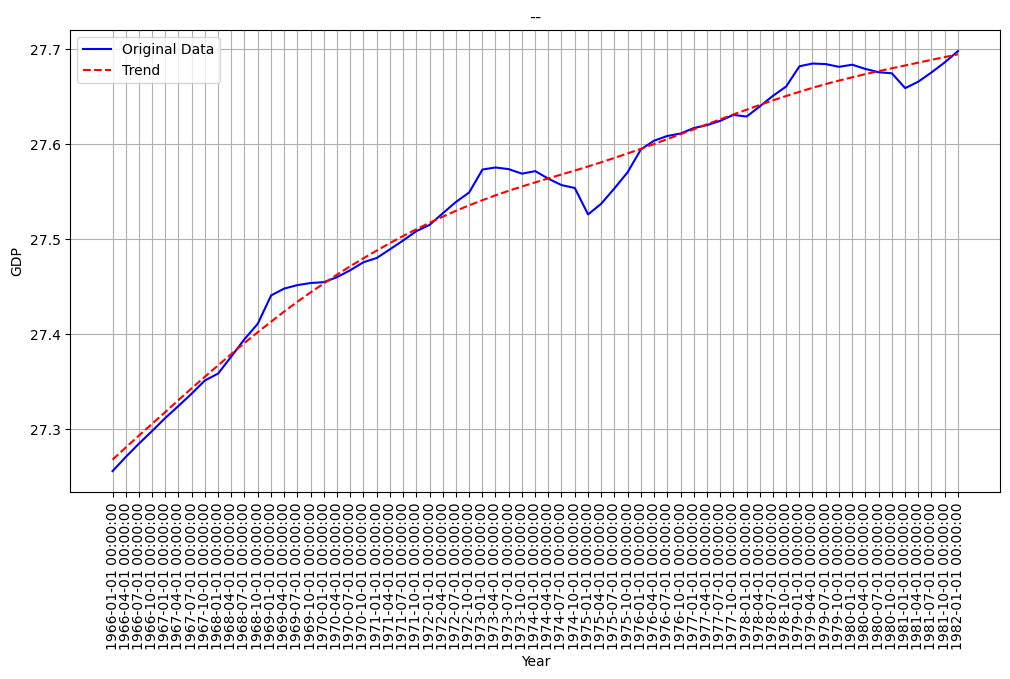

In [220]:
# all = [df['GDP'], df['Private consumption'], df['Private investment']]

plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['GDP'], label='Original Data', color='blue')
plt.plot(df['Quarter'], df['GDP trend'], label='Trend', color='red', linestyle='--')
plt.title('--')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.xticks(x_values, df['Quarter'], rotation=90)

plt.legend()
plt.grid(True)
plt.show()

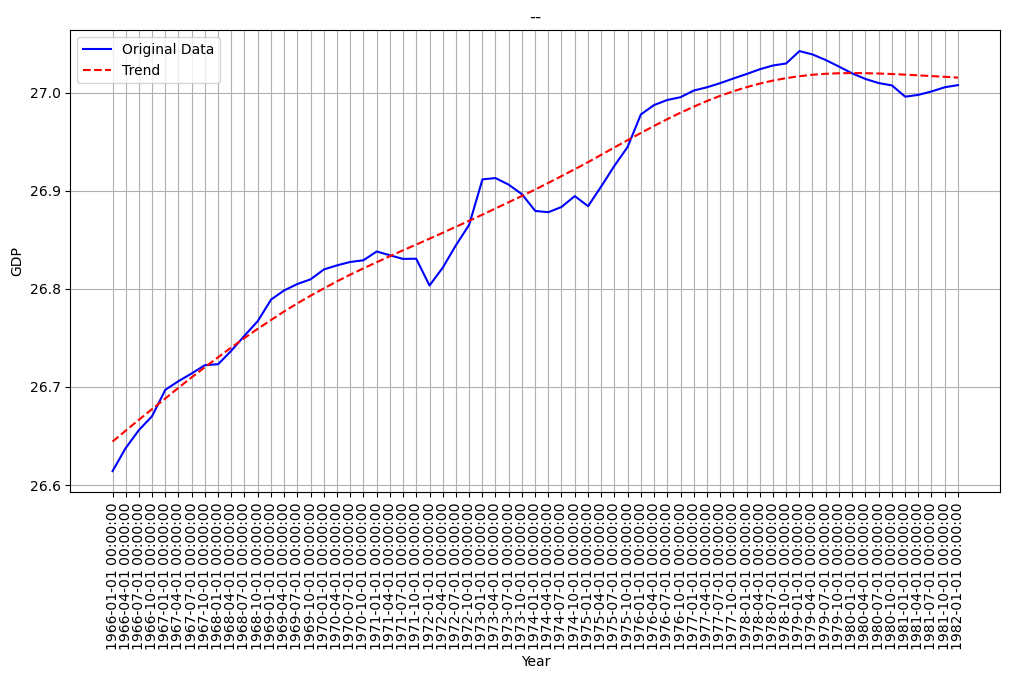

In [221]:
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['Private consumption'], label='Original Data', color='blue')
plt.plot(df['Quarter'], df['Private consumption trend'], label='Trend', color='red', linestyle='--')
plt.title('--')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.xticks(x_values, df['Quarter'], rotation=90)

plt.legend()
plt.grid(True)
plt.show()

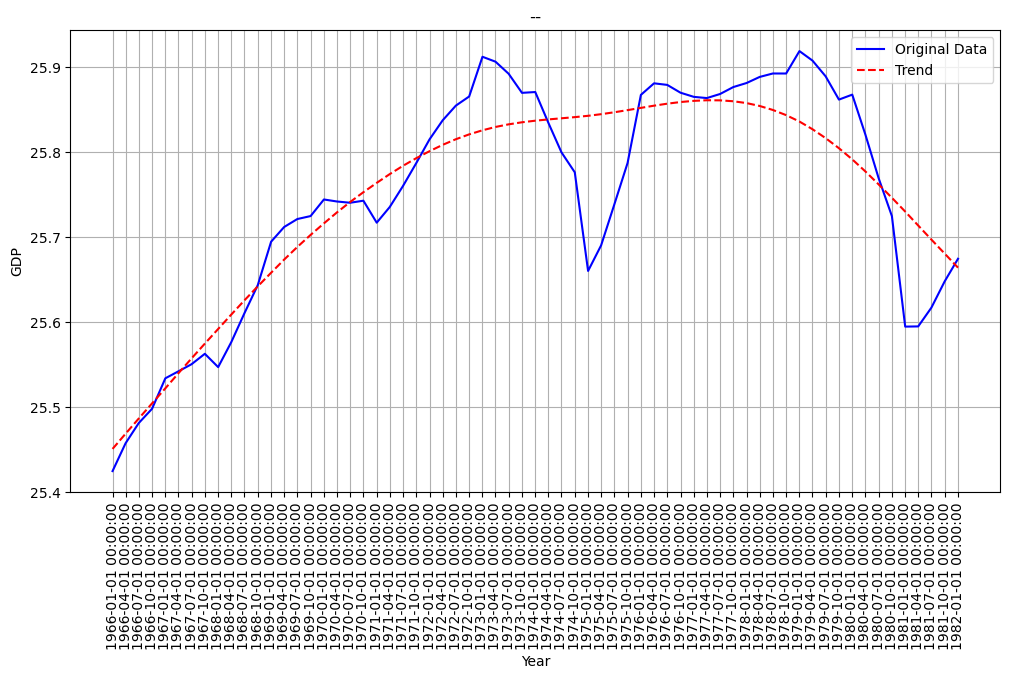

In [222]:
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['Private investment'], label='Original Data', color='blue')
plt.plot(df['Quarter'], df['Private investment trend'], label='Trend', color='red', linestyle='--')
plt.title('--')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.xticks(x_values, df['Quarter'], rotation=90)

plt.legend()
plt.grid(True)
plt.show()

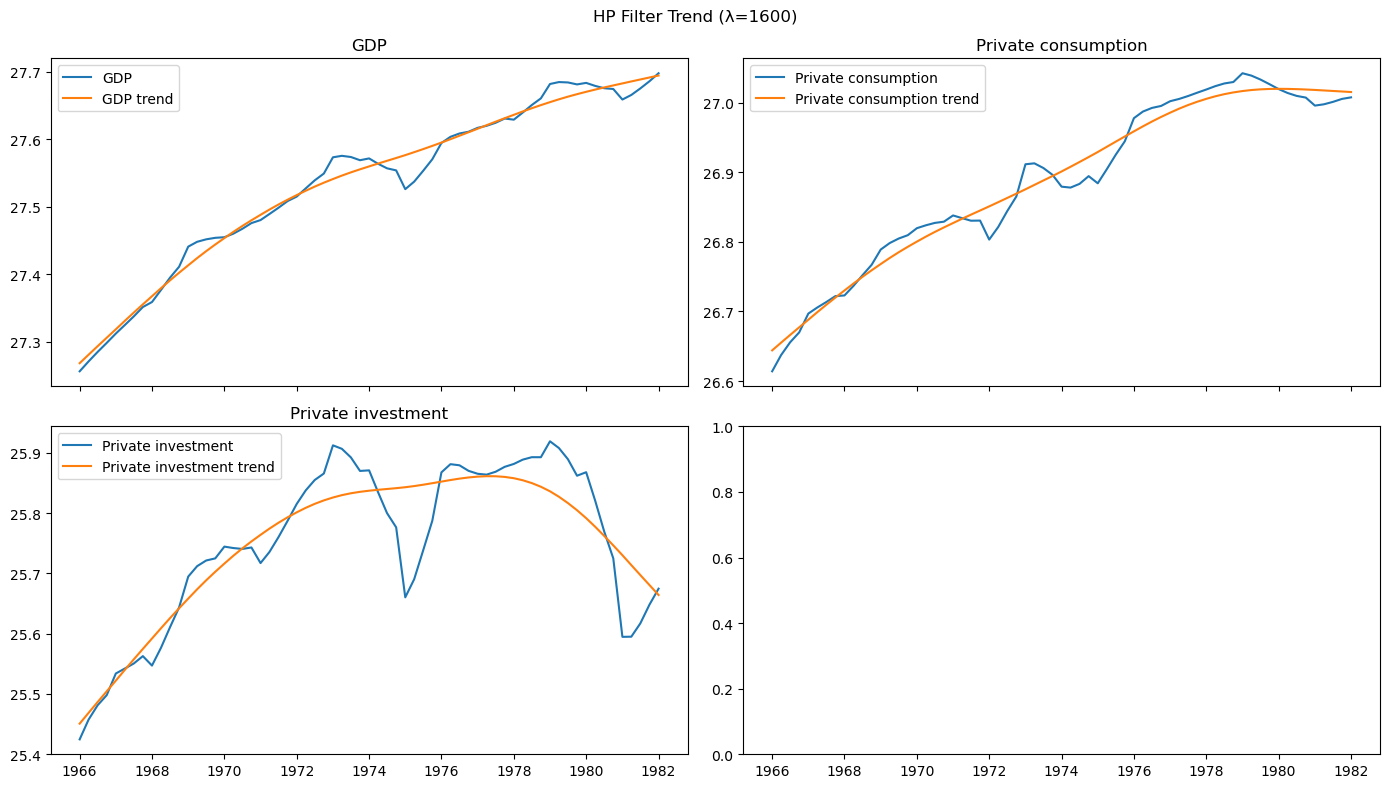

In [223]:



fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
data = ["GDP", "Private consumption", "Private investment"]
data_tr = ['GDP trend', 'Private consumption trend', 'Private investment trend']
for ax, data, data_tr in zip(axes.flatten(), data, data_tr):
    ax.plot(df['Quarter'], df[data], label=data)
    ax.plot(df['Quarter'], df[data_tr], label=data_tr)
    ax.set_title(data)
    ax.legend()
    
plt.suptitle(f"HP Filter Trend (λ={lam})")
plt.tight_layout()
plt.show()



In [224]:

df1 = df.iloc[16:-16]


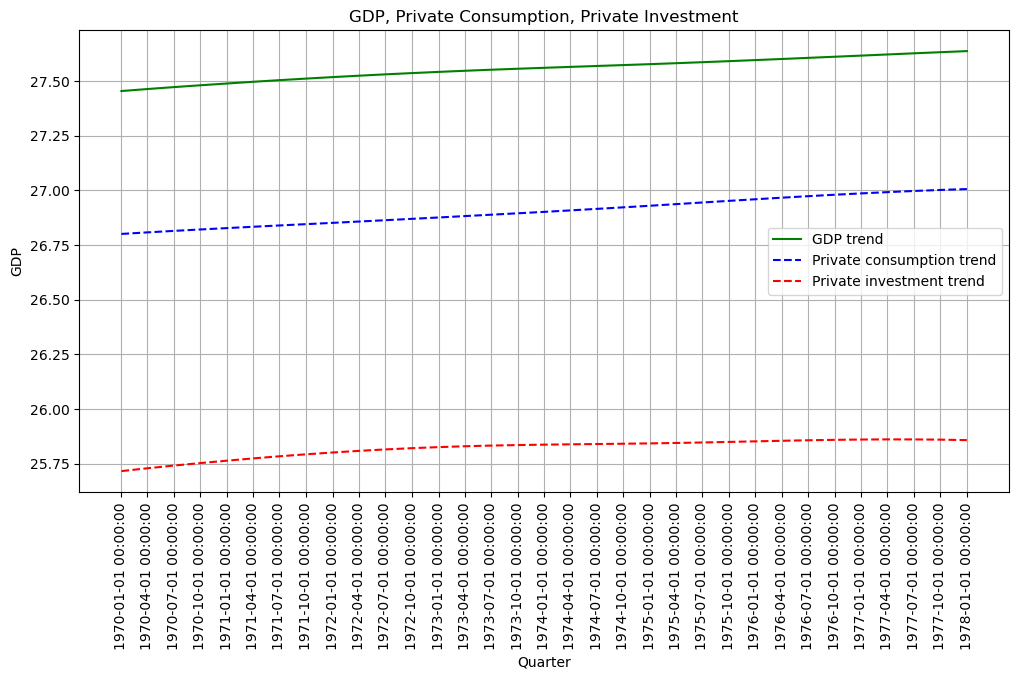

In [225]:
x_values_df1 = df1['Quarter']

plt.figure(figsize=(12, 6))

plt.plot(df1['Quarter'], df1['GDP trend'], label='GDP trend', color='green', linestyle='-')
plt.plot(df1['Quarter'], df1['Private consumption trend'], label='Private consumption trend', color='blue', linestyle='--')
plt.plot(df1['Quarter'], df1['Private investment trend'], label='Private investment trend', color='red', linestyle='--')
plt.title('GDP, Private Consumption, Private Investment')
plt.xlabel('Quarter')

plt.xticks(x_values_df1, df1['Quarter'], rotation=90)

plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

## 3

In [226]:
df['GDP cycle'] *= 100
df['Private consumption cycle'] *= 100
df['Private investment cycle'] *= 100

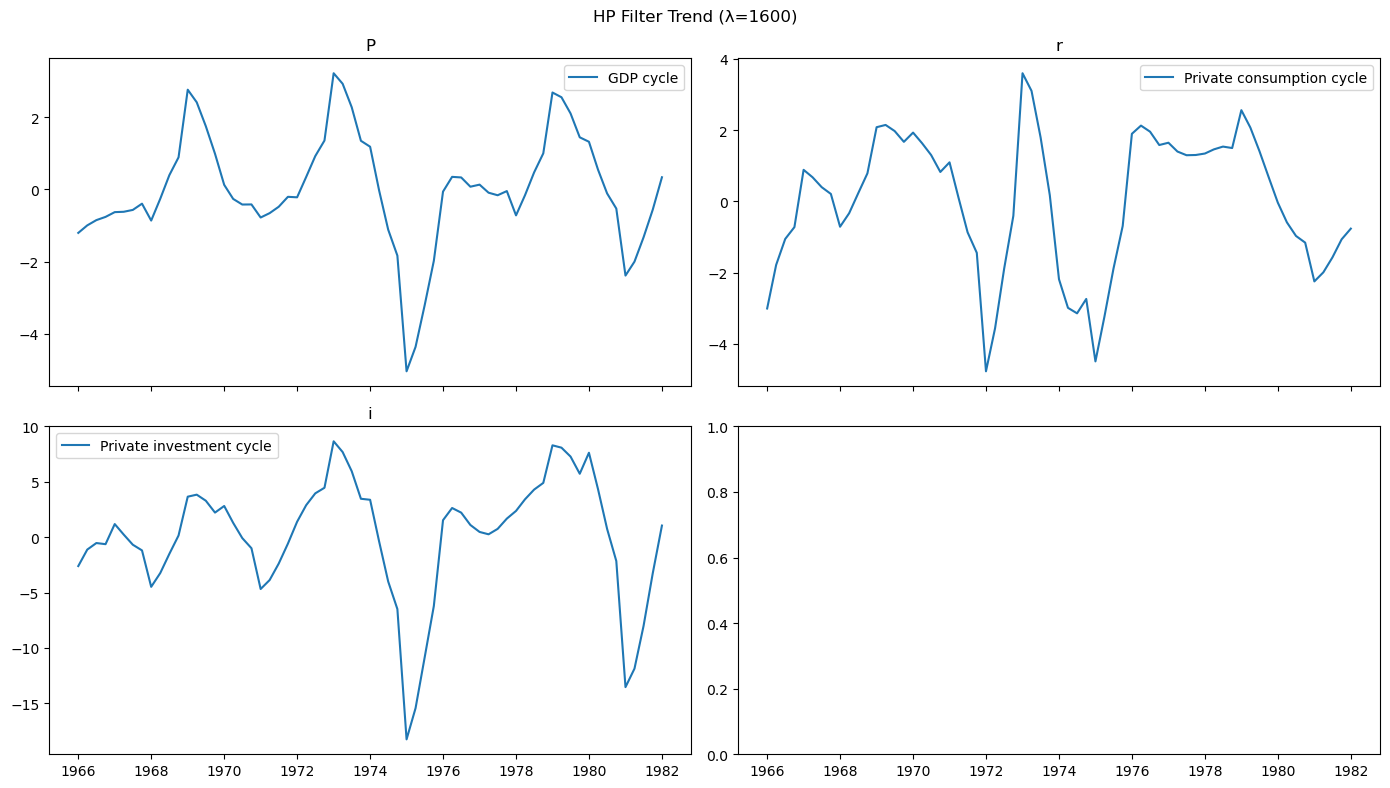

In [227]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
data_cy = ['GDP cycle', 'Private consumption cycle', 'Private investment cycle']
for ax, data, data_cy in zip(axes.flatten(), data, data_cy):
    ax.plot(df['Quarter'], df[data_cy], label=data_cy)
    ax.set_title(data)
    ax.legend()
    
plt.suptitle(f"HP Filter Trend (λ={lam})")
plt.tight_layout()
plt.show()

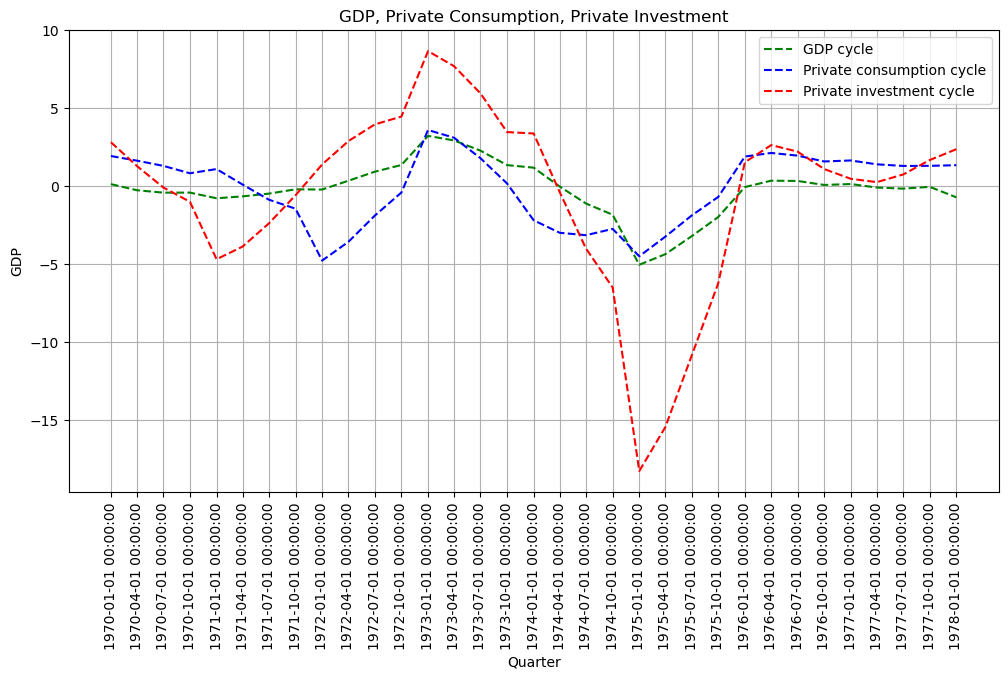

In [228]:
plt.figure(figsize=(12, 6))

plt.plot(df1['Quarter'], df1['GDP cycle'], label='GDP cycle', color='green', linestyle='--')
plt.plot(df1['Quarter'], df1['Private consumption cycle'], label='Private consumption cycle', color='blue', linestyle='--')
plt.plot(df1['Quarter'], df1['Private investment cycle'], label='Private investment cycle', color='red', linestyle='--')
plt.title('GDP, Private Consumption, Private Investment')
plt.xlabel('Quarter')

plt.xticks(x_values_df1, df1['Quarter'], rotation=90)

plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

# 4

In [ ]:
np.correlate